In [225]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
# Chargement  des donnéés à partir d'un fichier CSV
data = pd.read_csv("C:/Users/lenovo/Desktop/AirQualityUCI.csv", sep=";",decimal=",",na_values=200)
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [227]:
data1 = data.iloc[:9357,:15]# Sélection des 9357 premières lignes et des 15 premières colonnes

In [228]:
# Remplacer les valeurs manquantes (-200) par NaN et les supprimer
data1.replace(-200, float('nan'), inplace=True) # Remplacement par NaN
data1.dropna(inplace=True) # Suppression des lignes avec NaN

data1

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,30/04/2004,20.00.00,4.4,1449.0,501.0,19.5,1282.0,254.0,625.0,133.0,2100.0,1569.0,19.1,61.1,1.3345
1227,30/04/2004,21.00.00,3.1,1363.0,234.0,15.1,1152.0,189.0,684.0,110.0,1951.0,1495.0,18.2,65.4,1.3529
1228,30/04/2004,22.00.00,3.0,1371.0,212.0,14.6,1136.0,174.0,689.0,102.0,1927.0,1471.0,18.1,66.1,1.3579
1229,30/04/2004,23.00.00,3.1,1406.0,275.0,13.7,1107.0,167.0,718.0,108.0,1872.0,1384.0,17.7,66.9,1.3422


In [229]:
# Définition des features(X) et des targets(y)
X = data1[["PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T","RH","AH"]]
X

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1360.0,150.0,11.9,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1292.0,112.0,9.4,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,1402.0,88.0,9.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,1376.0,80.0,9.2,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1272.0,51.0,6.5,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
1226,1449.0,501.0,19.5,1282.0,625.0,133.0,2100.0,1569.0,19.1,61.1,1.3345
1227,1363.0,234.0,15.1,1152.0,684.0,110.0,1951.0,1495.0,18.2,65.4,1.3529
1228,1371.0,212.0,14.6,1136.0,689.0,102.0,1927.0,1471.0,18.1,66.1,1.3579
1229,1406.0,275.0,13.7,1107.0,718.0,108.0,1872.0,1384.0,17.7,66.9,1.3422


In [230]:
y = data1[["NOx(GT)","CO(GT)"]]
y

,NOx(GT),CO(GT)
0,166.0,2.6
1,103.0,2.0
2,131.0,2.2
3,172.0,2.2
4,131.0,1.6
...,...,...
1226,254.0,4.4
1227,189.0,3.1
1228,174.0,3.0
1229,167.0,3.1


In [231]:
# Partition des donnees en données de test et données d'entrainement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
# Standarisation des données 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Ajustement et transformation sur l'ensemble 
X_test_scaled = scaler.transform(X_test) # Transformation de l'ensemble de test avec le même scaler

In [233]:
#Choix et entrainement du modèle
model1 = RandomForestRegressor(n_estimators=100,random_state=42) # Création du modèle 
model1.fit(X_train_scaled, y_train) # Entraînement du modèle sur les données d'entraînement

RandomForestRegressor(random_state=42)

In [234]:
# Prédiction des targets avec le modèle RadomForestRegressor
y_pred1 = model1.predict(X_test_scaled) # Prédictions sur les données test
y_pred1

array([[2.2408e+02, 3.5550e+00],
       [6.3230e+01, 1.0470e+00],
       [2.7403e+02, 4.2600e+00],
       [1.9510e+02, 3.4890e+00],
       [1.4163e+02, 2.5800e+00],
       [9.5830e+01, 1.4770e+00],
       [1.7000e+02, 2.7270e+00],
       [1.7668e+02, 2.9000e+00],
       [6.1110e+01, 8.9600e-01],
       [1.9520e+01, 3.8100e-01],
       [1.7509e+02, 2.8900e+00],
       [8.0880e+01, 1.2100e+00],
       [2.4434e+02, 4.2380e+00],
       [8.6140e+01, 1.3000e+00],
       [9.4440e+01, 1.5270e+00],
       [1.4682e+02, 2.4710e+00],
       [1.6673e+02, 2.7450e+00],
       [1.9382e+02, 3.0510e+00],
       [1.0572e+02, 1.8770e+00],
       [1.3493e+02, 2.0260e+00],
       [1.3373e+02, 2.4430e+00],
       [1.4078e+02, 2.2200e+00],
       [6.2910e+01, 9.6300e-01],
       [9.3710e+01, 1.5400e+00],
       [3.0934e+02, 5.3700e+00],
       [2.8370e+01, 5.3700e-01],
       [1.1747e+02, 2.0430e+00],
       [8.1370e+01, 1.2910e+00],
       [2.1279e+02, 3.7220e+00],
       [3.2925e+02, 5.6910e+00],
       [5.

In [235]:
#Erreur quadratique moyenne 
mse = mean_squared_error(y_test, y_pred1) # Calcul du MSE
print(f"Erreur quadratique moyenne:{mse}")

Erreur quadratique moyenne:243.1144116303031


In [236]:
# Coefficient de determination
r2 = r2_score(y_test,y_pred1) # Calcul du R²
print(f"coefficient de determination:{r2}")

coefficient de determination:0.9486001170249109


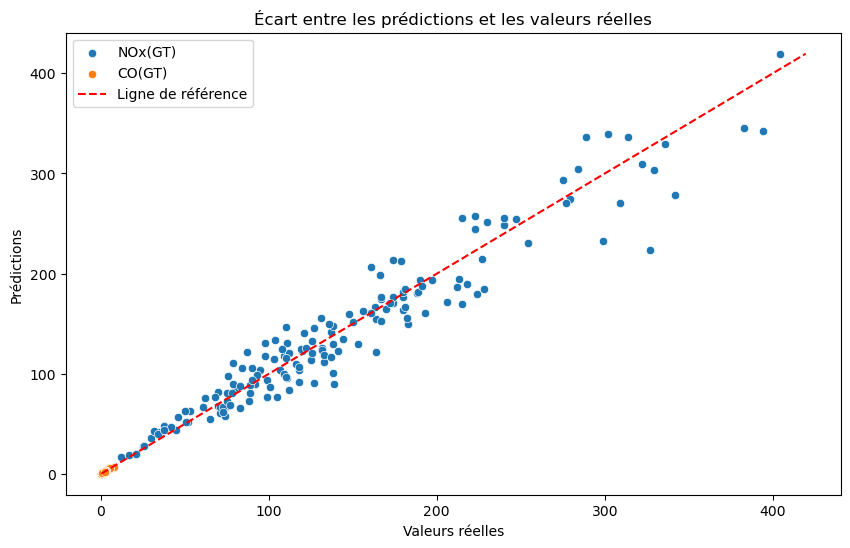

In [237]:
# visualisation de l'écart entre les prédictions et les valeurs réelles
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test['NOx(GT)'], y=y_pred1[:, 0], label='NOx(GT)')
sns.scatterplot(x=y_test['CO(GT)'], y=y_pred1[:, 1], label='CO(GT)')
min_val = min(y_test['NOx(GT)'].min(), y_pred1.min())
max_val = max(y_test['CO(GT)'].max(), y_pred1.max())
plt.plot([min_val, max_val ], [min_val, max_val], color='red',linestyle='--', label='Ligne de référence')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.legend()
plt.title('Écart entre les prédictions et les valeurs réelles')
plt.show()


In [238]:
# Modèle 2 (GradientBoostingRegressor)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [239]:
# Normalisation des données d'entraînement
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train_scaled)


In [240]:
# Choix et entraînement du modèle
model2 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model2.fit(X_train_normalized, y_train['NOx(GT)'])


GradientBoostingRegressor(random_state=42)

In [241]:
model2.fit(X_train_normalized, y_train['CO(GT)'])

GradientBoostingRegressor(random_state=42)

In [242]:
# Prédiction des targets avec le modèle(GradientBoostingRegressor)
y_pred2 = model2.predict(X_test_normalized)
y_pred2


array([3.66450033, 1.04557935, 4.29684332, 3.57688288, 2.67692526,
       1.39579109, 2.75935152, 2.76924995, 0.79543886, 0.48436299,
       2.91538798, 1.2647355 , 4.18721625, 1.26976422, 1.56879383,
       2.39192791, 2.80858634, 3.37210022, 1.72149998, 1.88010588,
       2.46997607, 2.16593873, 1.04078414, 1.61122072, 5.33094263,
       0.6095585 , 2.03910885, 1.27829311, 3.63948434, 5.35437741,
       0.74214263, 1.58144267, 5.51220758, 1.88490018, 2.82969556,
       0.7814759 , 3.2413476 , 2.29784806, 1.80006244, 1.08174529,
       6.12709573, 5.9585133 , 4.3288087 , 0.54804085, 1.29386958,
       2.92492671, 2.19646714, 2.97930392, 4.50092898, 4.42203493,
       1.73638134, 1.71520104, 0.91751309, 2.87792727, 1.24472414,
       0.94812729, 2.94663372, 2.25644726, 0.49937964, 2.01085412,
       3.02688623, 1.53391492, 3.96708705, 3.87504358, 1.88241968,
       3.04461132, 1.86965985, 1.61998313, 2.68914936, 2.35128846,
       1.01963884, 1.88798437, 1.87042083, 1.22221947, 3.14634

In [243]:
# Erreur quadratique moyenne
mse = mean_squared_error(y_test['NOx(GT)'], y_pred2)
print(f"Erreur quadratique moyenne:{mse}")

Erreur quadratique moyenne:26338.017343865667


In [244]:
# Coefficient de détermination
r2 = r2_score(y_test['NOx(GT)'], y_pred2)
print(f"coefficient de determination:{r2}")

coefficient de determination:-2.9104294015764656


In [245]:
# Conversion de DataFrames Pandas vers Numpy
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_pred2_np = y_pred2
y_test_np = y_test['NOx(GT)'].to_numpy()


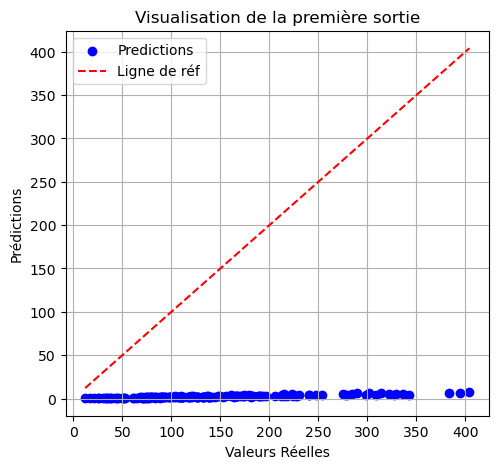

In [246]:
# Visualisation de la première sortie
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test_np, y_pred2_np, c='b', marker='o', label='Predictions')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--', label='Ligne de réf')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Visualisation de la première sortie')
plt.legend()
plt.grid()
plt.show()

In [247]:
# Modèle 3 (SVR)
from sklearn.svm import SVR

In [248]:
# Normalisation des données d'entraînement
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train_scaled)


In [249]:
# Choix et entraînement du modèle
model3 = SVR(kernel='rbf')
model3.fit(X_train_normalized, y_train['NOx(GT)'])

SVR()

In [250]:
# Prédiction des targets avec le modèle choisi
y_pred3 = model3.predict(X_test_normalized)
y_pred3


array([209.23909829,  65.46788823, 208.48399832, 202.30699716,
       146.9033129 , 102.51517498, 160.1810555 , 160.78049171,
        74.74696237,  67.86399544, 170.13926343,  86.76536865,
       192.60274694,  86.85923544,  93.11774196, 157.91166577,
       157.19006786, 183.77707271, 126.79811688, 126.655991  ,
       142.56156363, 139.48692871,  79.95191799,  95.87331929,
       206.0122909 ,  63.80170665, 128.97331589,  79.21040289,
       171.42478305, 198.53382307,  72.78680063,  96.16925396,
       215.68185851, 133.20462166, 164.71668901,  77.01048841,
       191.78526322, 144.29822032, 111.88942079,  75.62498294,
       191.6647189 , 183.9747224 , 207.4722616 ,  58.87328216,
        89.80525858, 167.17751848, 135.26096746, 185.42254514,
       206.26383853, 211.88821945, 125.23371862, 107.73244682,
        79.26170986, 158.84412772,  98.84374868,  71.95586661,
       164.61541939, 133.06041081,  74.56864344, 131.2588376 ,
       172.63111582,  90.90059354, 197.69944497, 185.63

In [251]:
# Erreur quadratique moyenne
mse = mean_squared_error(y_test['NOx(GT)'], y_pred3)
print(f"Erreur quadratique moyenne:{mse}")

Erreur quadratique moyenne:2398.3029485448724


In [252]:
# Coefficient de détermination
r2 = r2_score(y_test['NOx(GT)'], y_pred3)
print(f"coefficient de determination:{r2}")

coefficient de determination:0.6439217788706597


In [253]:
# Conversion de DataFrames Pandas vers Numpy
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_pred3_np = y_pred3
y_test_np = y_test['NOx(GT)'].to_numpy()



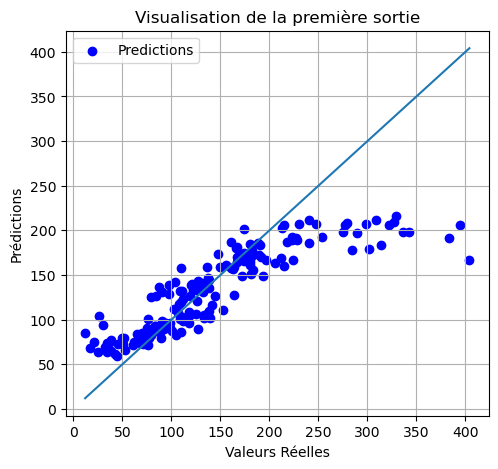

In [254]:
# Visualisation de la première sortie
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test_np, y_pred3_np, c='b', marker='o', label='Predictions')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()])
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Visualisation de la première sortie')
plt.legend()
plt.grid()
plt.show()


In [255]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

In [256]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [258]:
model4 = KNeighborsRegressor(n_neighbors=5)
model4.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [259]:
# Prédiction des targets avec le modèle choisi
y_pred4 = model4.predict(X_test_scaled)
y_pred4

array([[2.608e+02, 4.000e+00],
       [5.540e+01, 8.400e-01],
       [2.522e+02, 4.060e+00],
       [1.938e+02, 3.400e+00],
       [1.250e+02, 2.400e+00],
       [1.020e+02, 1.640e+00],
       [1.672e+02, 2.500e+00],
       [1.708e+02, 2.680e+00],
       [6.740e+01, 8.000e-01],
       [3.140e+01, 5.000e-01],
       [1.804e+02, 2.900e+00],
       [7.780e+01, 1.300e+00],
       [2.418e+02, 4.860e+00],
       [8.320e+01, 1.260e+00],
       [9.280e+01, 1.520e+00],
       [1.420e+02, 2.380e+00],
       [1.686e+02, 2.660e+00],
       [2.032e+02, 3.000e+00],
       [1.034e+02, 1.860e+00],
       [1.346e+02, 1.860e+00],
       [1.354e+02, 2.440e+00],
       [1.446e+02, 2.300e+00],
       [6.980e+01, 9.600e-01],
       [9.320e+01, 1.540e+00],
       [2.922e+02, 5.160e+00],
       [3.220e+01, 6.000e-01],
       [1.090e+02, 1.920e+00],
       [7.720e+01, 1.260e+00],
       [1.770e+02, 3.320e+00],
       [3.258e+02, 5.660e+00],
       [5.580e+01, 8.400e-01],
       [1.080e+02, 1.620e+00],
       [

In [260]:
#Erreur quadratique moyenne 
mse = mean_squared_error(y_test, y_pred4) 
print(f"Erreur quadratique moyenne:{mse}")

Erreur quadratique moyenne:273.94174909090907


In [261]:
# Coefficient de détermination
r2 = r2_score(y_test, y_pred4)
print(f"coefficient de determination:{r2}")

coefficient de determination:0.9415518473467465


In [262]:
# Modele 5
# Séparer les données en ensembles d'entraînement et de test
from sklearn.neural_network import MLPRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [263]:
# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [264]:
# Modele 5 (MLPRegressor)
model5 =  MLPRegressor(max_iter=1000,alpha=0.01)
model5.fit(X_train_scaled, y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.01, max_iter=1000)

In [265]:
# Prédiction des targets avec le modèle choisi
y_pred5 = model5.predict(X_test_normalized)
y_pred5

array([[126.49546109,   2.08694235],
       [ 86.60367141,   1.4694497 ],
       [133.91845379,   2.17232586],
       [120.71248168,   1.99663948],
       [109.2107039 ,   1.83751355],
       [105.89220036,   1.69712644],
       [116.86849327,   1.95033538],
       [110.53613976,   1.78852059],
       [ 88.31641543,   1.49235037],
       [ 62.38043849,   1.17750837],
       [114.77618148,   1.93707121],
       [ 99.47132544,   1.58881072],
       [121.49698087,   2.05971403],
       [ 93.45624842,   1.48334884],
       [ 89.22710747,   1.56327262],
       [109.36150984,   1.75733446],
       [112.43030133,   1.85794318],
       [120.3428111 ,   2.00527734],
       [ 88.7272175 ,   1.56676172],
       [107.63484186,   1.79408506],
       [100.28352994,   1.6644069 ],
       [112.32311788,   1.85921256],
       [ 92.92580681,   1.55047659],
       [ 93.39389833,   1.62046531],
       [136.41623032,   2.2530638 ],
       [ 67.01527801,   1.24455789],
       [ 96.83839417,   1.66270954],
 

In [266]:
#Erreur quadratique moyenne 
mse = mean_squared_error(y_test, y_pred5) 
print(f"Erreur quadratique moyenne:{mse}")

Erreur quadratique moyenne:2838.9042065839626


In [267]:
# Coefficient de détermination
r2 = r2_score(y_test, y_pred5)
print(f"coefficient de determination:{r2}")

coefficient de determination:0.17782742166492183


In [268]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [269]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [271]:
# Modele 6 (LASSO)
model6 = Lasso()
model6.fit(X_train_scaled, y_train)

Lasso()

In [272]:
# Prédiction des targets avec le modèle choisi
y_pred6 = model6.predict(X_test_scaled)
y_pred6

array([[222.30298796,   2.68845816],
       [ 71.42935926,   2.00906759],
       [264.89930633,   2.78407609],
       [222.97525239,   2.73878338],
       [157.40814038,   2.45192959],
       [109.06117478,   2.08455543],
       [161.20962078,   2.46702716],
       [173.20286952,   2.42173445],
       [ 62.2681488 ,   2.00403506],
       [ 10.71444065,   1.88325452],
       [169.63619247,   2.50728734],
       [ 97.42710056,   2.04429525],
       [249.10675418,   2.99040952],
       [ 99.34923825,   2.02416515],
       [ 76.66359681,   2.13991318],
       [151.07569787,   2.41166941],
       [176.93962079,   2.46199463],
       [198.96163196,   2.542515  ],
       [ 86.2914934 ,   2.2556612 ],
       [129.46682726,   2.1449457 ],
       [135.98298352,   2.542515  ],
       [149.9932336 ,   2.26572625],
       [ 78.0193568 ,   2.02416515],
       [ 86.91480046,   2.12984813],
       [284.15545361,   3.06086484],
       [ 19.26112121,   1.90338461],
       [114.96340562,   2.3009539 ],
 

In [273]:
#Erreur quadratique moyenne 
mse = mean_squared_error(y_test, y_pred6) 
print(f"Erreur quadratique moyenne:{mse}")

Erreur quadratique moyenne:345.472355403084


In [274]:
# Coefficient de détermination
r2 = r2_score(y_test, y_pred6)
print(f"coefficient de determination:{r2}")

coefficient de determination:0.6749353369967825


In [275]:
# Modele 7(DecisionTreeRegressor)
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [276]:
# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [277]:
model7 = DecisionTreeRegressor()
model7.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [278]:
# Prédiction des targets avec le modèle choisi
y_pred7 = model7.predict(X_test_scaled)
y_pred7

array([[2.45e+02, 3.20e+00],
       [6.10e+01, 1.00e+00],
       [2.17e+02, 3.40e+00],
       [2.38e+02, 4.50e+00],
       [1.38e+02, 2.60e+00],
       [1.05e+02, 1.80e+00],
       [1.58e+02, 2.50e+00],
       [1.59e+02, 3.00e+00],
       [5.60e+01, 8.00e-01],
       [2.10e+01, 3.00e-01],
       [1.56e+02, 2.70e+00],
       [8.30e+01, 1.60e+00],
       [2.81e+02, 4.60e+00],
       [9.50e+01, 1.50e+00],
       [9.60e+01, 1.50e+00],
       [1.46e+02, 2.10e+00],
       [1.55e+02, 2.90e+00],
       [1.57e+02, 3.10e+00],
       [9.10e+01, 1.70e+00],
       [1.25e+02, 2.00e+00],
       [1.32e+02, 2.40e+00],
       [1.39e+02, 1.90e+00],
       [7.70e+01, 1.30e+00],
       [8.70e+01, 1.60e+00],
       [2.71e+02, 5.40e+00],
       [3.30e+01, 7.00e-01],
       [9.10e+01, 1.70e+00],
       [7.90e+01, 1.20e+00],
       [2.63e+02, 3.80e+00],
       [3.96e+02, 5.30e+00],
       [5.70e+01, 1.00e+00],
       [1.05e+02, 1.80e+00],
       [2.56e+02, 4.40e+00],
       [1.20e+02, 2.00e+00],
       [1.47e+

In [279]:
#Erreur quadratique moyenne 
mse = mean_squared_error(y_test, y_pred7) 
print(f"Erreur quadratique moyenne:{mse}")

Erreur quadratique moyenne:480.45509090909087


In [280]:
# Coefficient de détermination
r2 = r2_score(y_test, y_pred7)
print(f"coefficient de determination:{r2}")

coefficient de determination:0.9009441694554812


In [281]:
# Modele 8(ElasticNet)
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [282]:
# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [283]:
model8 = ElasticNet()
model8.fit(X_train_scaled, y_train)

ElasticNet()

In [284]:
# Prédiction des targets avec le modèle choisi
y_pred8 = model8.predict(X_test_scaled)
y_pred8

array([[223.04985002,   3.13913001],
       [ 76.25972478,   1.63104221],
       [244.8188284 ,   3.31487223],
       [214.22570809,   3.14735874],
       [154.84247432,   2.48570386],
       [108.71003161,   1.79703551],
       [166.99358051,   2.67430899],
       [167.66143944,   2.62166065],
       [ 76.30083399,   1.62352922],
       [ 17.42998489,   1.14398819],
       [178.36423294,   2.81577501],
       [ 96.24911801,   1.70372594],
       [249.54118745,   3.63435605],
       [ 88.83666714,   1.63830008],
       [ 86.34507031,   1.83482769],
       [159.92476721,   2.54029125],
       [165.48600028,   2.55371279],
       [194.87970533,   2.82681958],
       [109.3631604 ,   2.24255406],
       [130.594599  ,   2.08201662],
       [142.09331568,   2.53609373],
       [149.36559419,   2.26750178],
       [ 85.67638934,   1.68552226],
       [ 93.43695195,   1.84950435],
       [280.16665977,   3.85329157],
       [ 26.92033808,   1.233773  ],
       [128.37838617,   2.35555952],
 

In [285]:
#Erreur quadratique moyenne 
mse = mean_squared_error(y_test, y_pred8) 
print(f"Erreur quadratique moyenne:{mse}")

Erreur quadratique moyenne:386.84276688123015


In [286]:
# Coefficient de détermination
r2 = r2_score(y_test, y_pred8)
print(f"coefficient de determination:{r2}")

coefficient de determination:0.8327680759204139


In [287]:
# Modele 9(Ridge)
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [288]:
# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [289]:
model9 = Ridge()
model9.fit(X_train_scaled, y_train)

Ridge()

In [290]:
# Prédiction des targets avec le modèle choisi
y_pred9 = model9.predict(X_test_scaled)
y_pred9

array([[ 2.23597645e+02,  3.72362693e+00],
       [ 7.05429319e+01,  1.04637506e+00],
       [ 2.66379201e+02,  4.16888494e+00],
       [ 2.24661189e+02,  3.79204692e+00],
       [ 1.58992961e+02,  2.64847322e+00],
       [ 1.07943805e+02,  1.51420126e+00],
       [ 1.52647873e+02,  2.62963413e+00],
       [ 1.74488267e+02,  2.71450079e+00],
       [ 6.17507849e+01,  7.86354115e-01],
       [ 5.73485618e+00,  3.27144389e-01],
       [ 1.60408020e+02,  2.87279743e+00],
       [ 9.99030504e+01,  1.37169513e+00],
       [ 2.46219231e+02,  4.77408042e+00],
       [ 9.96570192e+01,  1.39211326e+00],
       [ 7.48824974e+01,  1.30099587e+00],
       [ 1.45146050e+02,  2.40584997e+00],
       [ 1.76453691e+02,  2.77208125e+00],
       [ 2.02454543e+02,  3.43458942e+00],
       [ 8.04450585e+01,  1.61623571e+00],
       [ 1.32204884e+02,  1.94588244e+00],
       [ 1.35714774e+02,  2.26948379e+00],
       [ 1.50276884e+02,  2.28384735e+00],
       [ 8.24207285e+01,  1.04335164e+00],
       [ 8.

In [291]:
#Erreur quadratique moyenne 
mse = mean_squared_error(y_test, y_pred9) 
print(f"Erreur quadratique moyenne:{mse}")

Erreur quadratique moyenne:338.5469835128183


In [292]:
# Coefficient de détermination
r2 = r2_score(y_test, y_pred9)
print(f"coefficient de determination:{r2}")

coefficient de determination:0.934717301421889
